# 📌 Extracão

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
dados = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [274]:
dados = pd.read_json(dados)
df = pd.DataFrame(dados)

In [275]:
for i in range(2,6):
  coluna = df.columns[2]
  df = df.drop(columns=[coluna]).join(pd.json_normalize(df[coluna]))

In [276]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# 🔧 Transformação

In [277]:
colunas_uteis = ['Churn','tenure','Contract','SeniorCitizen','PaperlessBilling','PaymentMethod','Charges.Monthly', 'Charges.Total']
dados_evasao = df[colunas_uteis].copy()

In [278]:
dados_evasao = dados_evasao.rename(columns={"Churn":"PlanoCancelado","tenure":"MesesContrato", "Contract":"TipoContrato","SeniorCitizen":"ClienteSenior","PaperlessBilling":"PagamentoPapel","PaymentMethod":"MetodoPagamento",
                                   "Charges.Monthly":"TotalServicosPorMes","Charges.Total":"TotalGasto"})

In [279]:
dados_evasao['PagamentoPapel'] = dados_evasao['PagamentoPapel'].replace({"Yes": 1,"No": 0})
dados_evasao['PlanoCancelado'] = dados_evasao['PlanoCancelado'].replace({"Yes": 1,"No": 0})

/tmp/ipython-input-2849514373.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_evasao['PagamentoPapel'] = dados_evasao['PagamentoPapel'].replace({"Yes": 1,"No": 0})


In [280]:
dados_evasao = dados_evasao.replace(r'^\s+|\s+$', '', regex=True)

In [281]:
dados_evasao['TipoContrato'] = dados_evasao['TipoContrato'].astype(str)
dados_evasao['MetodoPagamento'] = dados_evasao['MetodoPagamento'].astype(str)
dados_evasao['PlanoCancelado'] = dados_evasao['PlanoCancelado'].replace(r'^\s*$', '0', regex=True)
dados_evasao['PlanoCancelado'] = dados_evasao['PlanoCancelado'].astype(int)

In [282]:
dados_evasao['TotalGasto'] = pd.to_numeric(dados_evasao['TotalGasto'], errors='coerce')
dados_evasao['TotalGasto'] = dados_evasao['TotalGasto'].fillna(0)

In [283]:
dados_evasao['Contas_Diarias'] = (dados_evasao['TotalServicosPorMes'] / 30).round(2)

In [284]:
dados_evasao['MetodoPagamento'] = dados_evasao['MetodoPagamento'].replace(
    {"Electronic check": "Cheque Eletronico",
     "Mailed check":"Cheque Correio",
     "Credit card (automatic)":"Cartao de Credito (Automatico)",
     "Bank transfer (automatic)":"Transferencia Bancaria (Automatico)"}
)

dados_evasao['TipoContrato'] = dados_evasao['TipoContrato'].replace(
    {"Month-to-month":"Mensal",
    "One year":"Anual",
     "Two year":"Bienal"}
)

In [285]:
print(dados_evasao['MetodoPagamento'].unique())
print(dados_evasao['TipoContrato'].unique())

['Cheque Correio' 'Cheque Eletronico' 'Cartao de Credito (Automatico)'
 'Transferencia Bancaria (Automatico)']
['Anual' 'Mensal' 'Bienal']


In [286]:
dados_evasao = dados_evasao.reset_index(drop=True)

In [287]:
dados_evasao = dados_evasao.sort_values(by="TotalServicosPorMes", ascending=False)

In [288]:
dados_evasao

,PlanoCancelado,MesesContrato,TipoContrato,ClienteSenior,PagamentoPapel,MetodoPagamento,TotalServicosPorMes,TotalGasto,Contas_Diarias
5523,0,72,Bienal,0,1,Transferencia Bancaria (Automatico),118.75,8672.45,3.96
6537,0,71,Bienal,0,1,Cheque Eletronico,118.65,8477.60,3.96
4182,0,61,Anual,0,1,Cheque Eletronico,118.60,7365.70,3.95
4366,0,68,Bienal,0,0,Cheque Correio,118.60,7990.05,3.95
5998,1,67,Anual,0,1,Transferencia Bancaria (Automatico),118.35,7804.15,3.94
...,...,...,...,...,...,...,...,...,...
7233,0,25,Bienal,0,1,Cheque Correio,18.70,383.65,0.62
434,0,53,Bienal,0,0,Cheque Correio,18.70,1005.70,0.62
579,0,36,Bienal,0,1,Cartao de Credito (Automatico),18.55,689.00,0.62
7090,0,59,Bienal,0,0,Transferencia Bancaria (Automatico),18.40,1057.85,0.61


# 📊 Carga e análise

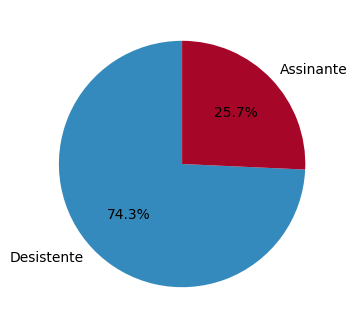

In [337]:
fig, ax = plt.subplots(figsize=(8,4))
plt.style.use('bmh')
plt.pie((dados_evasao['PlanoCancelado'].value_counts()), labels=['Desistente', 'Assinante'], autopct='%1.1f%%', startangle=90)
plt.show()

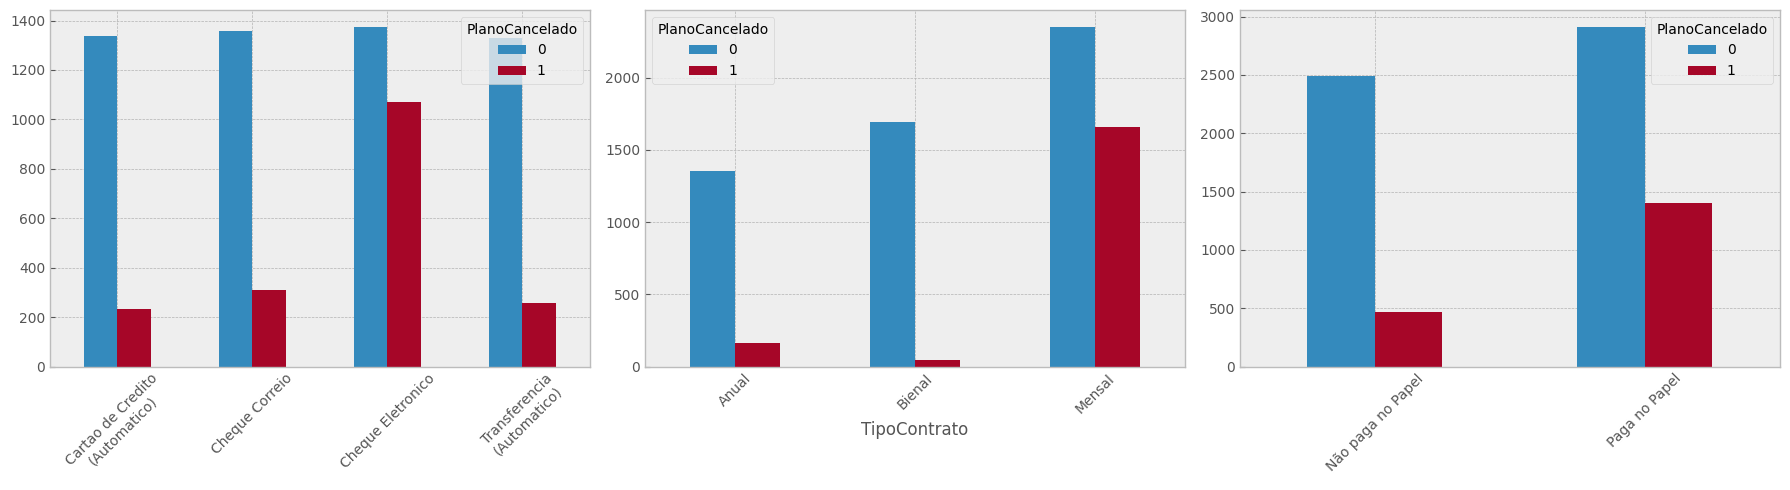

In [340]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
plt.style.use('bmh')
tabela1 = pd.crosstab(dados_evasao['MetodoPagamento'], dados_evasao['PlanoCancelado'])
tabela1.index = ['Cartao de Credito\n(Automatico)', 'Cheque Correio', 'Cheque Eletronico', 'Transferencia\n(Automatico)']
tabela1.plot(kind='bar', rot=45, ax=axes[0])

tabela2 = pd.crosstab(dados_evasao['TipoContrato'], dados_evasao['PlanoCancelado'])
tabela2.plot(kind='bar', rot=45, ax=axes[1])

tabela3 = pd.crosstab(dados_evasao['PagamentoPapel'], dados_evasao['PlanoCancelado'])
tabela3.index = ['Não paga no Papel', 'Paga no Papel']
tabela3.plot(kind='bar', rot=45, ax=axes[2])

ax.grid(True, zorder=0)
plt.tight_layout()
plt.show()

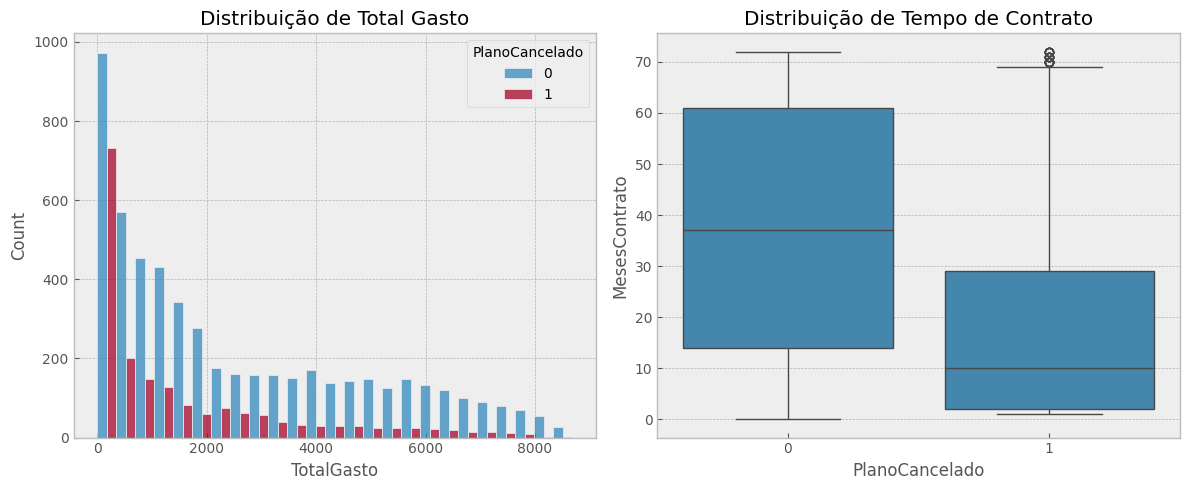

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))


sns.histplot(data=dados_evasao, x='TotalGasto', hue='PlanoCancelado', multiple='dodge', ax=axes[0])
axes[0].set_title('Distribuição de Total Gasto')

sns.boxplot(data=dados_evasao, x='PlanoCancelado', y='MesesContrato', ax=axes[1])
axes[1].set_title('Distribuição de Tempo de Contrato')

plt.tight_layout()
plt.show()

In [339]:
dados_evasao.describe()

,PlanoCancelado,MesesContrato,ClienteSenior,PagamentoPapel,TotalServicosPorMes,TotalGasto,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,32.346498,0.162653,0.593230,64.720098,2277.182035,2.157292
std,0.437115,24.571773,0.369074,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,29.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,55.000000,0.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [336]:
mediana_gasto_mensal = float(dados_evasao['TotalServicosPorMes'].median())
moda_gasto_mensal = float(dados_evasao['TotalServicosPorMes'].mode()[0])

print(mediana_gasto_mensal)
print(moda_gasto_mensal)

70.3
20.05


# 📄Relatorio Final

De acordo com os cálculos baseados na coluna "Total Gasto por Serviço no Mês" (em %), vemos os seguintes resultados:

- Média: 64,72%

- Mediana (valor central em uma sequência ordenada de dados): 70,30%

- Desvio padrão (medida de dispersão dos dados em relação à média): 30,12%

- Moda (valor mais frequente): 20,02%

Interpretação dos dados:
A mediana (70,30%) ser maior que a média (64,72%) revela uma assimetria negativa na distribuição, indicando que uma parcela significativa de clientes contribui com valores muito abaixo da maioria — puxando a média para baixo. O alto desvio padrão (30,12%) reforça essa heterogeneidade, mostrando que os gastos dos clientes estão amplamente dispersos em relação à média.

Implicações:

A moda em 20,02% (valor mais comum) expõe que muitos clientes gastam menos de um terço do valor típico (mediana).

Essa concentração de gastos baixos pode indicar insatisfação, subutilização do serviço ou adesão a planos muito baratos, impactando a receita.



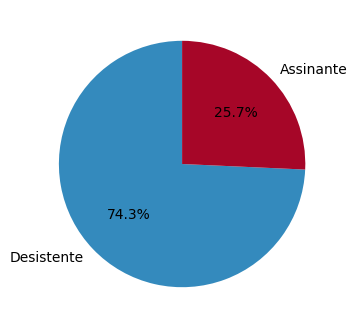

Vemos que a maior parte das pessoas cancelam a assinatura.

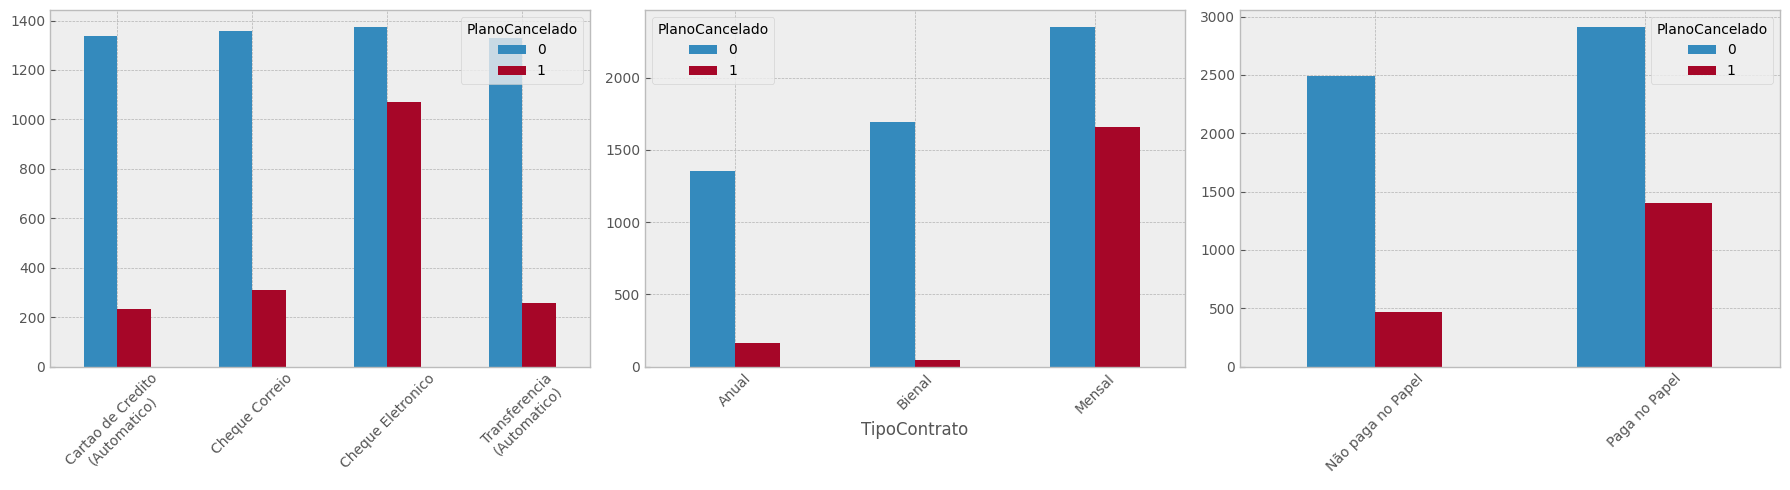

- No **primeiro gráfico**, que mostra as formas de pagamento, percebe-se que a maior parte dos cancelamentos ocorre entre clientes que utilizam cheque eletrônico. Esse fato provavelmente está relacionado à burocracia envolvida nesse método de pagamento, já que exige que o cliente se dirija pessoalmente ao banco para realizar a transação, tornando o processo mais trabalhoso e propenso a abandonos.

- O **segundo gráfico**, que analisa os tipos de contrato, revela que a maioria dos cancelamentos vem de assinantes com planos mensais. Isso sugere que a necessidade de renovação frequente – e, consequentemente, a repetição constante do processo de pagamento – pode estar desestimulando a permanência desses clientes.

- Por fim, o **terceiro gráfico** demonstra que quase metade dos clientes que pagam via boleto em papel acaba cancelando o plano. Esse alto índice de churn provavelmente está associado ao caráter manual e menos conveniente desse método de pagamento, que exige maior esforço por parte do usuário em comparação com alternativas automatizadas.

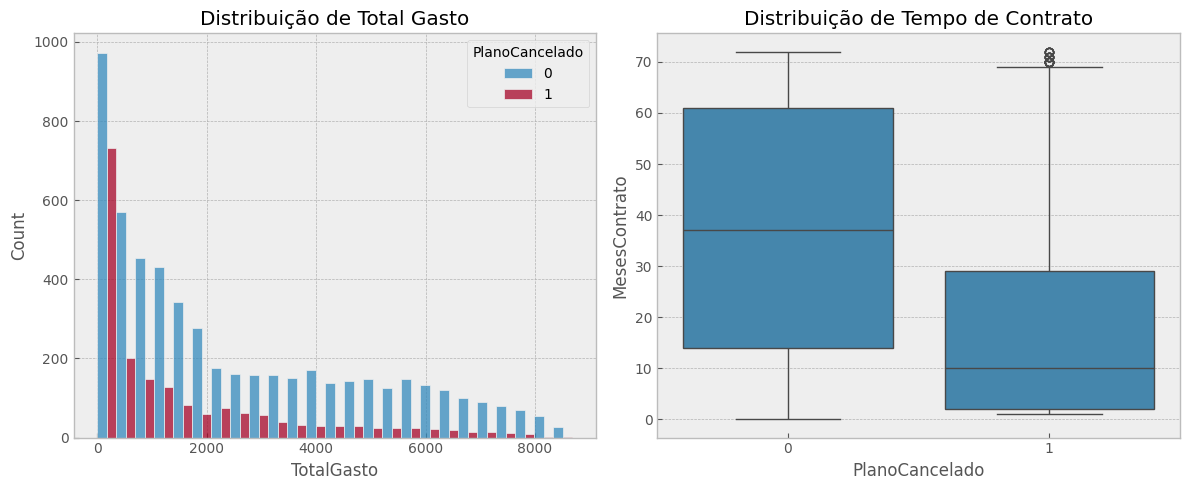

- No **primeiro gráfico**, observa-se que a maior parte dos cancelamentos vem de clientes com baixo gasto – ou seja, aqueles que não utilizam o serviço de forma significativa ou não permanecem assinantes por muito tempo. Isso sugere que esses usuários não encontram valor suficiente no plano para justificar a continuidade.

- O **segundo gráfico** reforça essa tendência, mostrando que quase metade dos cancelamentos ocorre entre clientes com menos de 30 meses de assinatura.

## Conclusão

Os dados mostram que a maioria dos cancelamentos vem de clientes com planos mais baratos, menos de 30 meses de contrato (principalmente abaixo de 10 meses), que usam cheque bancário e têm assinatura mensal. Isso sugere que esses clientes enfrentam dificuldades financeiras ou não veem valor suficiente para manter o plano a longo prazo.

Para reduzir esse problema, a empresa poderia criar estratégias específicas para esse perfil. Uma opção seria oferecer descontos progressivos nos primeiros meses para facilitar a adaptação, como 15% no primeiro mês, 10% no segundo e 5% no terceiro. Outra ideia é beneficiar quem paga com cheque, dando um pequeno desconto ou cashback para compensar a burocracia desse método.

Além disso, valeria a pena facilitar a migração para pagamentos automáticos, eliminando taxas ou dando um mês grátis na troca. Para os clientes com menos de 10 meses, um programa de fidelização com recompensas por tempo de uso poderia aumentar a retenção. O foco principal deve ser tornar o serviço mais acessível financeiramente e mais valioso na percepção desses clientes, evitando que eles desistam nos primeiros meses.